In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [109]:
import pandas as pd
from grdecl2numpy import get_prop_array
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
from tqdm.auto import tqdm
%matplotlib inline
import statsmodels.api as sm
import numpy as np

In [2]:
data = pd.read_csv('res.csv')
quis = pd.read_csv('quis.csv')
nres = quis.loc[quis['OWC'] <= 0 ]
res = data.loc[data['OWC'] > 0]

In [3]:
len(data.loc[data['Ant Tracking'] > 0])

151

In [4]:
res['Ant Tracking'].tolist() == data['Ant Tracking'].tolist()

True

In [5]:
_ys = data['i'].tolist()
ymax = np.max(_ys)
ymin = np.min(_ys)
#y_med = ymin+((ymax-ymin)/2)
y_med = np.median(data['i'])

ns=[]
for y in _ys:
    if y > y_med:
        ns.append(1)
    else:
        ns.append(0)
data['N/S'] = pd.Series(ns)

In [6]:
data.columns

Index(['X', 'Y', 'Z', 'i', 'j', 'k', 'dx', 'dy', 'dz', 'region', 'SW', 'phie',
       'OWC', 'Ant Tracking', 'GR', 'ILD', 'RHOB', 'N/S'],
      dtype='object')

In [7]:
north = res.loc[res['i'] < y_med]
south = res.loc[res['i'] >= y_med]

stat_n = north.describe()[['Ant Tracking', 'phie', 'SW', 'GR', 'RHOB', 'ILD']]
stat_s = south.describe()[['Ant Tracking', 'phie', 'SW', 'GR', 'RHOB', 'ILD']]
stat_res = res.describe()[['Ant Tracking', 'phie', 'SW', 'GR', 'RHOB', 'ILD']]
stat_quis = quis.describe()[['Ant Tracking', 'phie', 'SW', 'GR', 'RHOB', 'ILD']]
stat_nres = nres.describe()[['Ant Tracking', 'phie', 'SW', 'GR', 'RHOB', 'ILD']]
stat_n['ID'] = 'Norte'
stat_s['ID'] = 'Sul'
stat_res['ID'] = 'Reservatório'
stat_quis['ID'] = 'Quissamã'
stat_nres['ID'] = 'Não Reservatório'

In [8]:
dfs = [stat_n,stat_s,stat_res,stat_quis,stat_nres]
stat = pd.concat(dfs,axis=0)


In [15]:
stat.to_excel('prop_stat.xlsx')

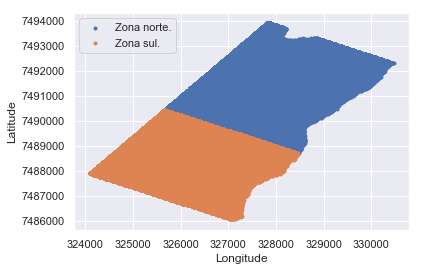

In [9]:
plt.scatter(north['X'],north['Y'],marker=".",label='Zona norte.')
plt.scatter(south['X'],south['Y'],marker=".",label='Zona sul.')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

In [10]:
res_at = stat.loc[stat['ID'] == 'Reservatório']['Ant Tracking']
m_at = res_at[1]
std_at = res_at[2]
threshold = round(m_at+1*std_at,2)
threshold2 = round(m_at+3*std_at,2)

In [11]:
f_north = north.loc[north['Ant Tracking'] > threshold]
f2_north = north.loc[north['Ant Tracking'] > threshold2]
f_south = south.loc[south['Ant Tracking'] > threshold]
f2_south = south.loc[south['Ant Tracking'] > threshold2]

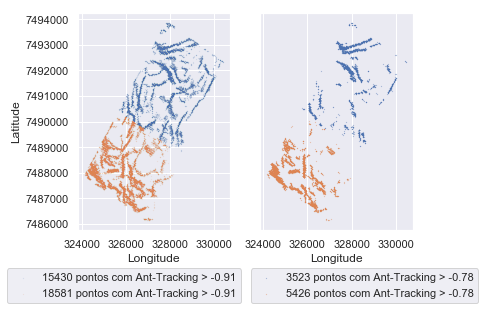

In [12]:
plt.subplot(1,2,1)
plt.scatter(f_north['X'],f_north['Y'],s=0.01,marker=".",label=str(len(f_north))+" pontos com Ant-Tracking > "+str(threshold))
plt.scatter(f_south['X'],f_south['Y'],s=0.01,marker=".",label=str(len(f_south))+" pontos com Ant-Tracking > "+str(threshold))
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, -0.15))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.subplot(1,2,2)
plt.scatter(f2_north['X'],f2_north['Y'],s=0.1,marker=".",label=str(len(f2_north))+" pontos com Ant-Tracking > "+str(threshold2))
plt.scatter(f2_south['X'],f2_south['Y'],s=0.1,marker=".",label=str(len(f2_south))+" pontos com Ant-Tracking > "+str(threshold2))
plt.yticks([])
plt.xlabel('Longitude')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.15))

([<matplotlib.axis.XTick at 0x231b3f01a90>,
 <a list of 3 Text xticklabel objects>)

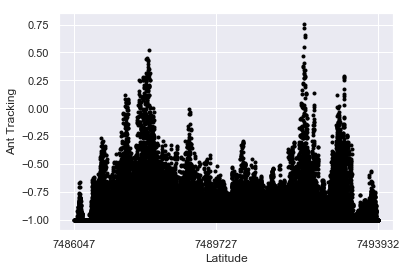

In [13]:
plt.scatter(data['Y'],data['Ant Tracking'],marker=".",c='black')
plt.xlabel('Latitude')
plt.ylabel('Ant Tracking')
plt.xticks([np.min(data['Y']),np.mean(data['Y']),np.max(data['Y'])])

In [14]:
rng = range(-10,8)

In [15]:
fracs=[]
fracn=[]
lims=[]
for i in rng:
    limiar = float(i/10)
    lims.append(limiar)
    nn = north.loc[north['Ant Tracking'] > limiar]
    ss = south.loc[south['Ant Tracking'] > limiar]
    ln = len(nn)
    ls = len(ss)
    t = ln+ls
    if t != 0:
        fracs.append(ls/t)
        fracn.append(ln/t)
    else:
        fracs.append(0)
        fracn.append(0)

Text(0, 0.5, '% células Ant-Tracking > Limiar')

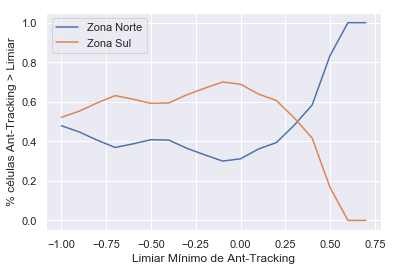

In [16]:
plt.plot(lims,fracn,label='Zona Norte')
plt.plot(lims,fracs,label='Zona Sul')
plt.legend()
plt.xlabel('Limiar Mínimo de Ant-Tracking')
plt.ylabel('% células Ant-Tracking > Limiar')

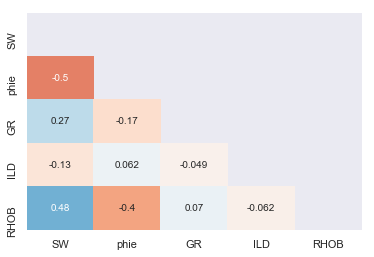

In [127]:
features = res[['SW', 'phie', 'GR', 'ILD', 'RHOB']]
corr = features.corr()
corr.to_excel('corr.xlsx')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True,
            mask=mask,
            cbar=False)